In [1]:
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
import pandas as pd
import scipy as sp
import numpy as np
import calendar

In [2]:
si = pd.read_excel("/home/jovyan/work/data/Climat.xlsx", sheet_name=0)

In [3]:
temperature=[]

## Récupération des températures depuis l'excel

for column in range(3, 15):
    month_temperature=[]
    for row in range(3, 34):
        temperature_value = si.iloc[row, column]
        if(not np.isnan(temperature_value)):
            month_temperature.append(temperature_value)
    temperature.append(month_temperature)

In [4]:
temperature_average_per_month=[]

# Calcul de la moyenne de température par mois

for month in range(len(temperature)):
    temperature_average = np.average(temperature[month])
    temperature_average_per_month.append(temperature_average)
    print("Month {!s} average temperature {!s}".format(calendar.month_name[month + 1], temperature_average))

Month January average temperature -8.96774193548387
Month February average temperature -4.928571428571429
Month March average temperature 1.1935483870967742
Month April average temperature 8.0
Month May average temperature 12.903225806451612
Month June average temperature 17.033333333333335
Month July average temperature 18.322580645161292
Month August average temperature 17.838709677419356
Month September average temperature 10.5
Month October average temperature 3.870967741935484
Month November average temperature -0.3333333333333333
Month December average temperature -7.0


In [5]:
temperature_standard_deviation_per_month=[]

# Calcul de l'écart type de température par mois

for month in range(len(temperature)):
    temperature_standard_deviation = np.std(temperature[month])
    temperature_standard_deviation_per_month.append(temperature_standard_deviation)
    print("Month {!s} standard deviation temperature {!s}".format(calendar.month_name[month + 1], temperature_standard_deviation))

Month January standard deviation temperature 4.417588533298653
Month February standard deviation temperature 4.479545348650044
Month March standard deviation temperature 3.4493510828589167
Month April standard deviation temperature 3.0983866769659336
Month May standard deviation temperature 3.970494717771346
Month June standard deviation temperature 2.9606680927715545
Month July standard deviation temperature 3.5139087396506374
Month August standard deviation temperature 2.653017444509947
Month September standard deviation temperature 2.29128784747792
Month October standard deviation temperature 1.7733135647593228
Month November standard deviation temperature 3.654525352977532
Month December standard deviation temperature 2.032002032003048


In [6]:
temperature_min_per_month=[]
temperature_max_per_month=[]

min_temp = temperature[0][0]
max_temp = temperature[0][0]

# Détermination du minimum et maximum de la température par mois et de l'année

for month in range(len(temperature)):
    temperature_min = min(temperature[month])
    temperature_max = max(temperature[month])
    temperature_min_per_month.append(temperature_min)
    temperature_max_per_month.append(temperature_max)
    if temperature_min < min_temp:
        min_temp = temperature_min
    if temperature_max > max_temp:
        max_temp = temperature_max
    print("{!s} min temp {!s} and max temp {!s}".format(calendar.month_name[month + 1], temperature_min, temperature_max))

print("Min temp {!s} and max temp {!s}".format(min_temp, max_temp))

January min temp -23 and max temp -3
February min temp -12 and max temp 5
March min temp -8 and max temp 7
April min temp 2 and max temp 16
May min temp 5 and max temp 18
June min temp 11 and max temp 22
July min temp 13 and max temp 26
August min temp 14 and max temp 26
September min temp 6 and max temp 16
October min temp 1 and max temp 7
November min temp -8 and max temp 5
December min temp -11 and max temp -3
Min temp -23 and max temp 26


<IPython.core.display.Javascript object>


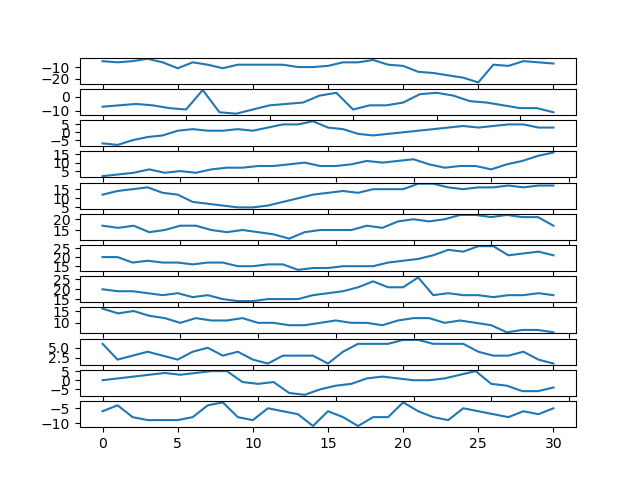

In [7]:
# Affichages de la température par mois via 1 figure

%matplotlib notebook

fig, axs = plt.subplots(12)

for month in range(len(temperature)):
    axs[month].plot(temperature[month])
    plt.show()

<IPython.core.display.Javascript object>


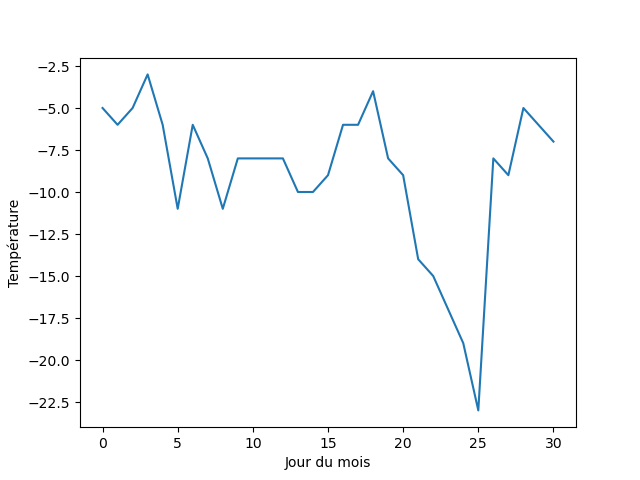

<IPython.core.display.Javascript object>


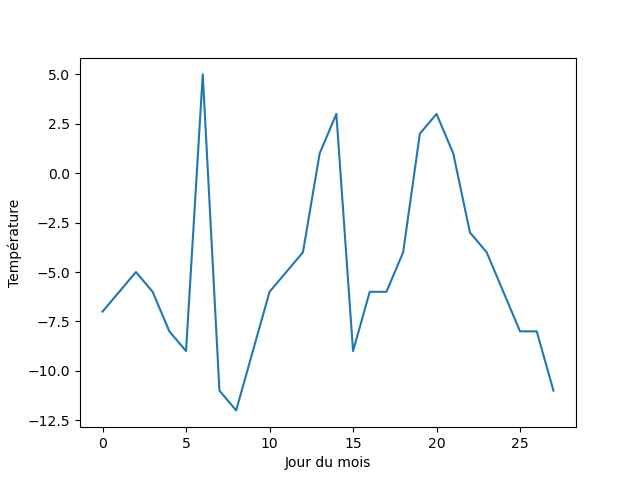

<IPython.core.display.Javascript object>


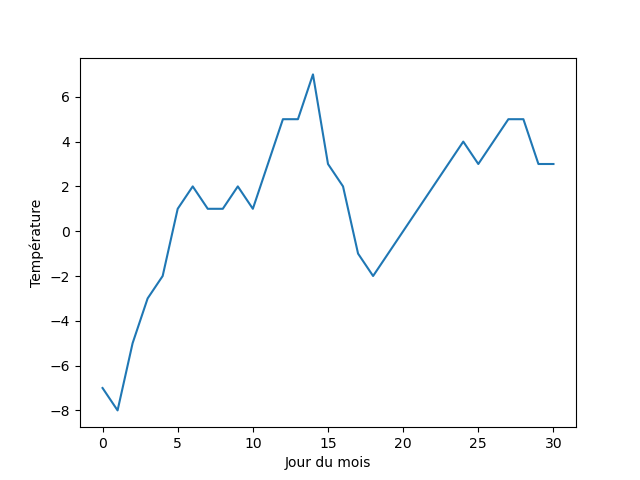

<IPython.core.display.Javascript object>


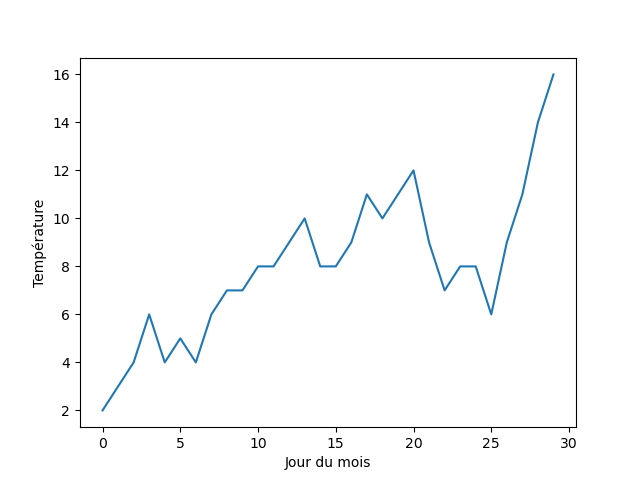

<IPython.core.display.Javascript object>


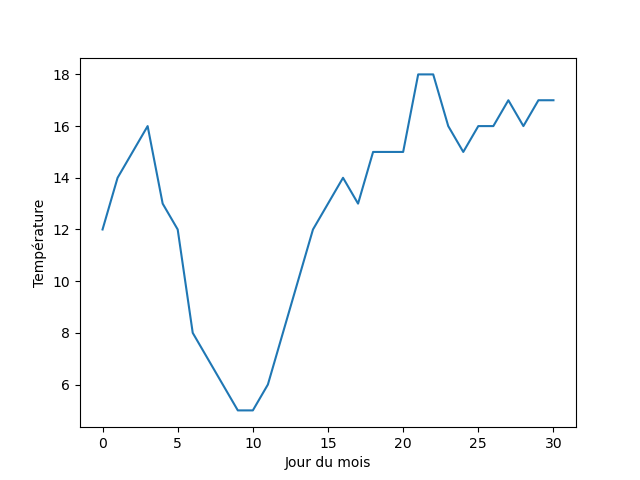

<IPython.core.display.Javascript object>


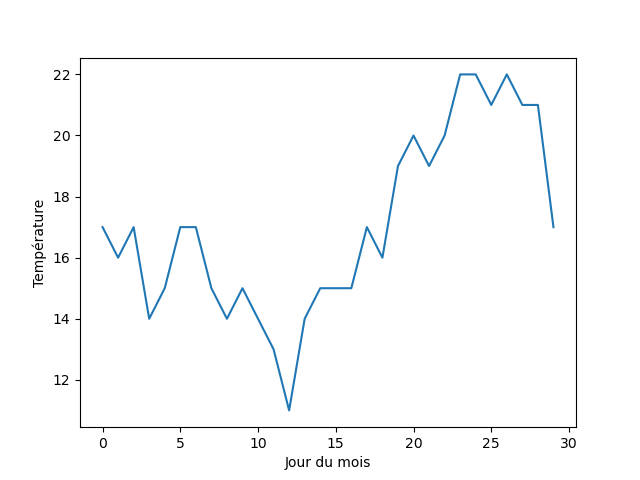

<IPython.core.display.Javascript object>


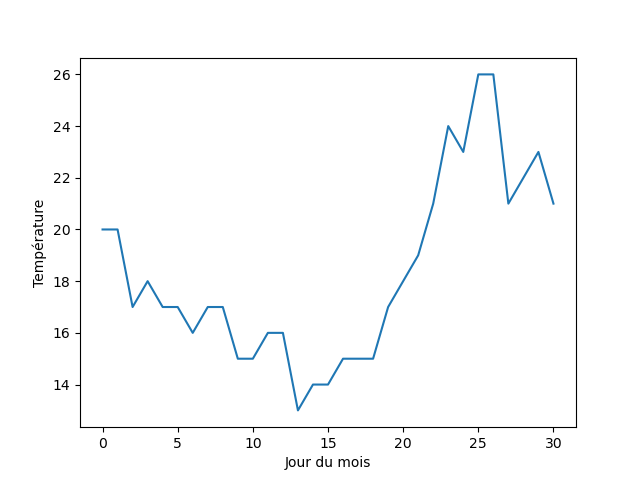

<IPython.core.display.Javascript object>


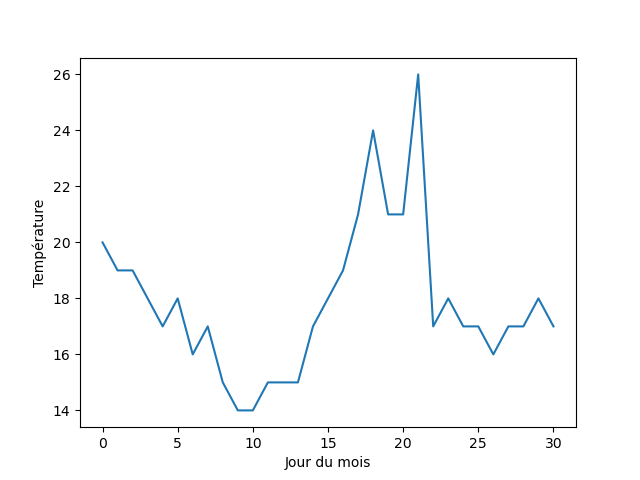

<IPython.core.display.Javascript object>


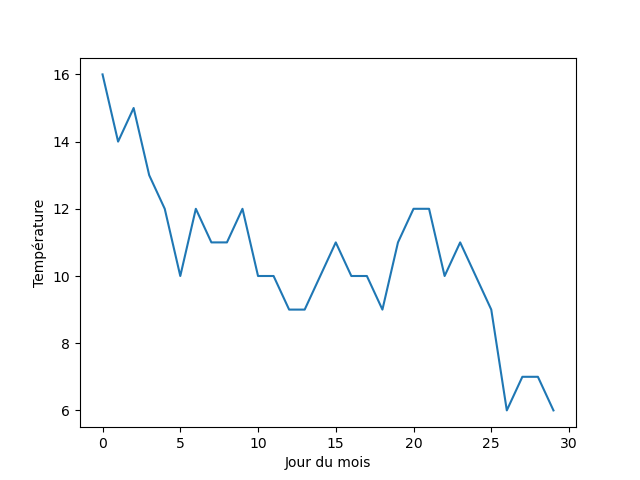

<IPython.core.display.Javascript object>


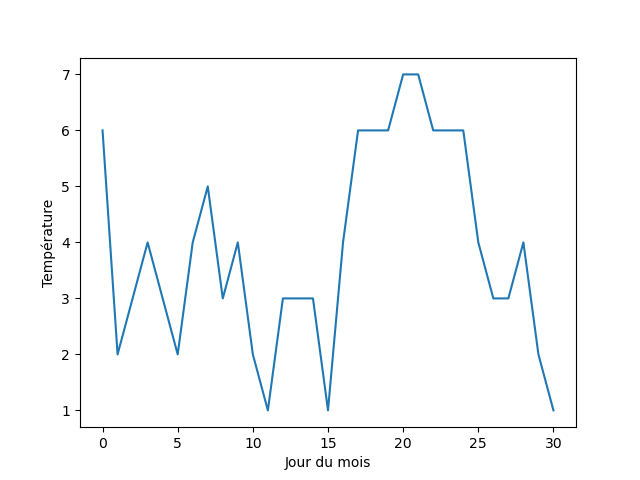

<IPython.core.display.Javascript object>


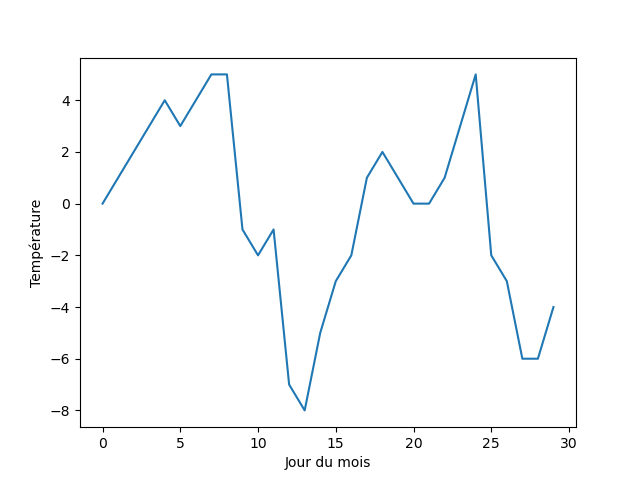

<IPython.core.display.Javascript object>


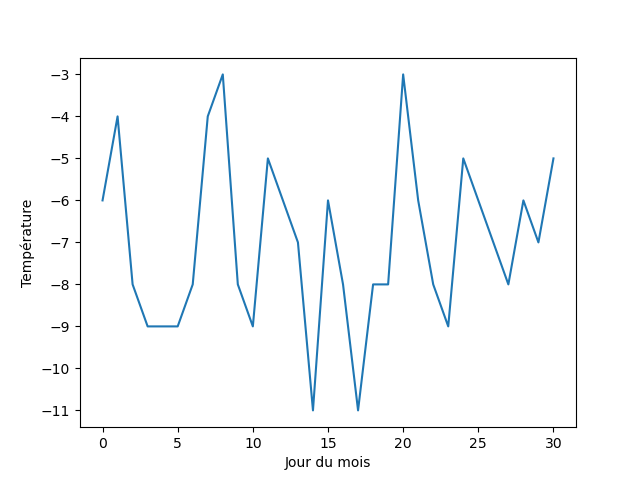

In [8]:
# Affichages de la température par mois via 12 figures

%matplotlib notebook

for month in range(len(temperature)):
    plot = plt.figure(month)
    plt.plot(temperature[month])
    plt.xlabel("Jour du mois")
    plt.ylabel("Température")

plt.show()

<IPython.core.display.Javascript object>


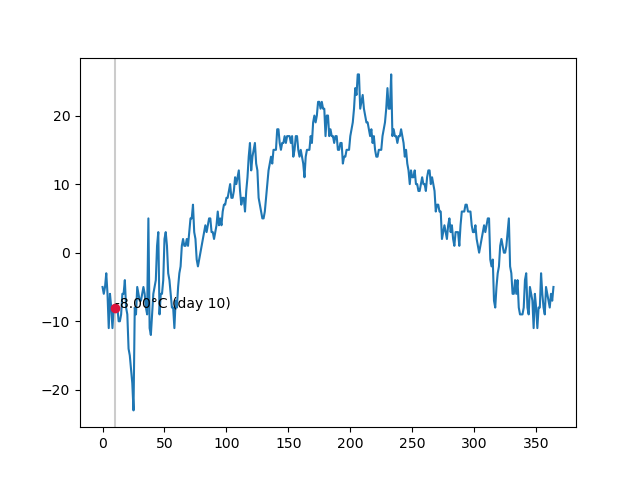

In [9]:
%matplotlib notebook

flatten = lambda t: [item for sublist in t for item in sublist]

class SnaptoCursor(object):
    def __init__(self, ax, x, y):
        self.ax = ax
        self.ly = ax.axvline(color='k', alpha=0.2)  # the vert line
        self.marker, = ax.plot([0],[0], marker="o", color="crimson", zorder=3) 
        self.x = x
        self.y = y
        self.txt = ax.text(0.7, 0.9, '')

    def mouse_move(self, event):
        if not event.inaxes: return
        x, y = event.xdata, event.ydata
        indx = np.searchsorted(self.x, [x])[0]
        x = self.x[indx]
        y = self.y[indx]
        self.ly.set_xdata(x)
        self.marker.set_data([x],[y])
        self.txt.set_text('%1.2f°C (day %1d)' % (y, x))
        self.txt.set_position((x,y))
        self.ax.figure.canvas.draw_idle()

t = np.arange(0, 365, 1)
fig, ax = plt.subplots()

cursor = SnaptoCursor(ax, t, flatten(temperature))
cid =  plt.connect('motion_notify_event', cursor.mouse_move)

ax.plot(t, flatten(temperature),)
plt.show()

<IPython.core.display.Javascript object>


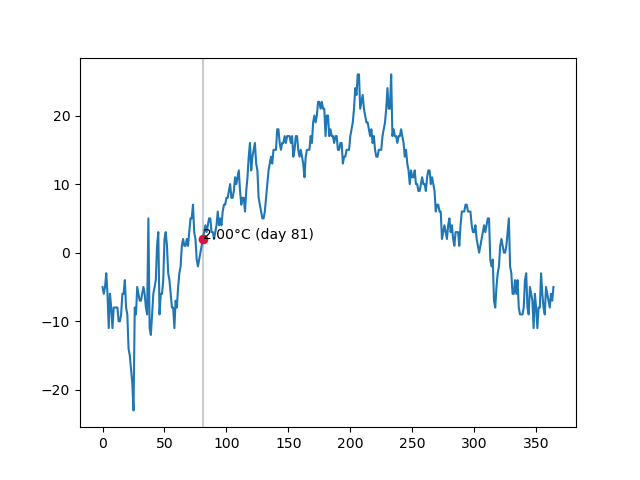

In [10]:
t = np.arange(0, 365, 1)
fig, ax = plt.subplots()

cursor = SnaptoCursor(ax, t, flatten(temperature))
cid =  plt.connect('motion_notify_event', cursor.mouse_move)

ax.plot(t, flatten(temperature),) 
plt.show()